In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

In [45]:
LFP_states = pd.read_csv('LFP_states.csv')
long_data = pd.read_csv('long_original.csv')

In [46]:
LFP_states

,current_state,YEAR,working_women,state_code,treatment
0,True,9,0.209302,26,1
1,True,11,0.162162,26,1
2,True,13,0.322581,26,1
3,True,15,0.461538,26,1
4,True,17,0.173913,26,1
5,True,19,0.437500,26,1
6,True,9,0.250000,40,1
7,True,11,0.600000,40,1
8,True,13,0.500000,40,1
9,True,15,0.333333,40,1


In [47]:
long_data.rename(columns={'# Child_BIRTHS_ALL_YEAR': 'Child_BIRTHS_ALL_YEAR'}, inplace=True)

In [48]:
long_data

,Child_BIRTHS_ALL_YEAR,MARITAL_STATUS_ALL_YEAR,RESID_STATE,AGE,EMPLOYMENT,EDUC_LEVEL,YEAR
0,0,1,47,14,0,0,1
1,3,4,47,10,0,0,1
2,0,4,47,8,0,0,1
3,4,1,47,17,7,10,1
4,2,1,47,16,7,10,1
...,...,...,...,...,...,...,...
24305,0,2,24,19,3,12,19
24306,2,2,0,0,0,0,19
24307,0,2,48,27,1,12,19
24308,0,2,48,22,1,11,19


In [49]:
LFP_states['post'] = (LFP_states['YEAR'] > 17).astype(int)

In [50]:
LFP_states['post_treatment'] = LFP_states['post'] * LFP_states['treatment']

In [51]:
#model without controls
model = smf.ols(formula='working_women ~ post + treatment + post_treatment', data=LFP_states).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          working_women   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1.864
Date:                Mon, 15 May 2023   Prob (F-statistic):              0.156
Time:                        23:29:26   Log-Likelihood:                 8.7555
No. Observations:                  36   AIC:                            -9.511
Df Residuals:                      32   BIC:                            -3.177
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1856      0.090      2.

In [52]:
# Add control variables to the model

In [53]:
control_variables = long_data.groupby(['RESID_STATE', 'YEAR']).agg({
    'AGE': 'mean',
    'EDUC_LEVEL': 'mean',
    'Child_BIRTHS_ALL_YEAR': 'mean'
}).reset_index()

In [54]:
States = [26, 40, 49, 25, 48, 24]
filtered_controls = control_variables[control_variables['RESID_STATE'].isin(States)]

In [55]:
filtered_controls

,RESID_STATE,YEAR,AGE,EDUC_LEVEL,Child_BIRTHS_ALL_YEAR
200,24,1,8.184211,0.684211,0.644737
201,24,3,10.173333,1.813333,0.706667
202,24,5,12.131579,2.565789,0.684211
203,24,7,14.157895,6.302632,0.763158
204,24,9,15.935897,6.166667,0.666667
205,24,11,17.865854,7.597561,0.670732
206,24,13,19.875000,9.237500,0.612500
207,24,15,22.192771,11.096386,0.614458
208,24,17,24.000000,12.141026,0.564103
209,24,19,25.963415,12.341463,0.670732


In [56]:
merged_data = LFP_states.merge(filtered_controls, left_on=['state_code', 'YEAR'], right_on=['RESID_STATE', 'YEAR'])

In [57]:
merged_data = merged_data.drop('RESID_STATE', axis=1)

In [58]:
merged_data

,current_state,YEAR,working_women,state_code,treatment,post,post_treatment,AGE,EDUC_LEVEL,Child_BIRTHS_ALL_YEAR
0,True,9,0.209302,26,1,0,0,16.057851,6.173554,0.892562
1,True,11,0.162162,26,1,0,0,17.771186,7.822034,0.847458
2,True,13,0.322581,26,1,0,0,19.881356,9.372881,0.923729
3,True,15,0.461538,26,1,0,0,22.103448,12.612069,0.922414
4,True,17,0.173913,26,1,0,0,24.076271,13.576271,0.957627
5,True,19,0.437500,26,1,1,1,26.017391,13.200000,1.017391
6,True,9,0.250000,40,1,0,0,16.714286,7.571429,0.785714
7,True,11,0.600000,40,1,0,0,19.117647,9.705882,1.176471
8,True,13,0.500000,40,1,0,0,20.937500,10.250000,1.187500
9,True,15,0.333333,40,1,0,0,23.411765,11.470588,1.294118


In [59]:
merged_data['post'] = (merged_data['YEAR'] > 17).astype(int)
merged_data['post_treatment'] = merged_data['post'] * merged_data['treatment']

In [60]:
merged_data.rename(columns={'# Child_BIRTHS_ALL_YEAR': 'Child_BIRTHS_ALL_YEAR'}, inplace=True)

In [61]:
merged_data

,current_state,YEAR,working_women,state_code,treatment,post,post_treatment,AGE,EDUC_LEVEL,Child_BIRTHS_ALL_YEAR
0,True,9,0.209302,26,1,0,0,16.057851,6.173554,0.892562
1,True,11,0.162162,26,1,0,0,17.771186,7.822034,0.847458
2,True,13,0.322581,26,1,0,0,19.881356,9.372881,0.923729
3,True,15,0.461538,26,1,0,0,22.103448,12.612069,0.922414
4,True,17,0.173913,26,1,0,0,24.076271,13.576271,0.957627
5,True,19,0.437500,26,1,1,1,26.017391,13.200000,1.017391
6,True,9,0.250000,40,1,0,0,16.714286,7.571429,0.785714
7,True,11,0.600000,40,1,0,0,19.117647,9.705882,1.176471
8,True,13,0.500000,40,1,0,0,20.937500,10.250000,1.187500
9,True,15,0.333333,40,1,0,0,23.411765,11.470588,1.294118


In [62]:
#model controlling for age, education level, number of children
model = smf.ols(formula='working_women ~ post + treatment + post_treatment + AGE + EDUC_LEVEL + Child_BIRTHS_ALL_YEAR', data=merged_data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          working_women   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     1.590
Date:                Mon, 15 May 2023   Prob (F-statistic):              0.186
Time:                        23:29:26   Log-Likelihood:                 10.976
No. Observations:                  36   AIC:                            -7.952
Df Residuals:                      29   BIC:                             3.132
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.35

In [63]:
long_data['marriage_dummies'] = long_data['MARITAL_STATUS_ALL_YEAR'].apply(lambda x: 1 if x==1 else 0)
long_data
#long_data = pd.concat([long_data, long_data], axis=1)

,Child_BIRTHS_ALL_YEAR,MARITAL_STATUS_ALL_YEAR,RESID_STATE,AGE,EMPLOYMENT,EDUC_LEVEL,YEAR,marriage_dummies
0,0,1,47,14,0,0,1,1
1,3,4,47,10,0,0,1,0
2,0,4,47,8,0,0,1,0
3,4,1,47,17,7,10,1,1
4,2,1,47,16,7,10,1,1
...,...,...,...,...,...,...,...,...
24305,0,2,24,19,3,12,19,0
24306,2,2,0,0,0,0,19,0
24307,0,2,48,27,1,12,19,0
24308,0,2,48,22,1,11,19,0


In [64]:
marital_proportions = long_data.groupby(['RESID_STATE', 'YEAR'])['marriage_dummies'].mean().reset_index()

In [65]:
marital_proportions

,RESID_STATE,YEAR,marriage_dummies
0,0,1,0.224806
1,0,3,0.229008
2,0,5,0.245283
3,0,7,0.261538
4,0,9,0.228571
...,...,...,...
497,56,11,0.500000
498,56,13,0.666667
499,56,15,0.500000
500,56,17,0.400000


In [66]:
States = [26, 40, 49, 25, 48, 24]
filtered_marriage = marital_proportions[marital_proportions['RESID_STATE'].isin(States)]
filtered_marriage

,RESID_STATE,YEAR,marriage_dummies
200,24,1,0.092105
201,24,3,0.133333
202,24,5,0.105263
203,24,7,0.118421
204,24,9,0.102564
205,24,11,0.109756
206,24,13,0.100000
207,24,15,0.120482
208,24,17,0.115385
209,24,19,0.109756


In [67]:
merged_data_marriage = pd.merge(merged_data, filtered_marriage, left_on=['state_code', 'YEAR'], right_on=['RESID_STATE', 'YEAR'], how='left')

In [68]:
merged_data_marriage

,current_state,YEAR,working_women,state_code,treatment,post,post_treatment,AGE,EDUC_LEVEL,Child_BIRTHS_ALL_YEAR,RESID_STATE,marriage_dummies
0,True,9,0.209302,26,1,0,0,16.057851,6.173554,0.892562,26,0.173554
1,True,11,0.162162,26,1,0,0,17.771186,7.822034,0.847458,26,0.211864
2,True,13,0.322581,26,1,0,0,19.881356,9.372881,0.923729,26,0.211864
3,True,15,0.461538,26,1,0,0,22.103448,12.612069,0.922414,26,0.267241
4,True,17,0.173913,26,1,0,0,24.076271,13.576271,0.957627,26,0.220339
5,True,19,0.437500,26,1,1,1,26.017391,13.200000,1.017391,26,0.234783
6,True,9,0.250000,40,1,0,0,16.714286,7.571429,0.785714,40,0.142857
7,True,11,0.600000,40,1,0,0,19.117647,9.705882,1.176471,40,0.235294
8,True,13,0.500000,40,1,0,0,20.937500,10.250000,1.187500,40,0.187500
9,True,15,0.333333,40,1,0,0,23.411765,11.470588,1.294118,40,0.176471


In [69]:
merged_data_marriage['post'] = (merged_data_marriage['YEAR'] > 17).astype(int)
merged_data_marriage['post_treatment'] = merged_data_marriage['post'] * merged_data_marriage['treatment']

In [70]:
#model controlling for age, education level, number of children, maritial status
model = smf.ols(formula='working_women ~ post + treatment + post_treatment + AGE + EDUC_LEVEL + Child_BIRTHS_ALL_YEAR + marriage_dummies', data=merged_data_marriage)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          working_women   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     1.362
Date:                Mon, 15 May 2023   Prob (F-statistic):              0.260
Time:                        23:29:26   Log-Likelihood:                 11.131
No. Observations:                  36   AIC:                            -6.263
Df Residuals:                      28   BIC:                             6.405
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.41

In [71]:
# perform regression on person level
#cluster stds at personal level

In [72]:
Age_25 = long_data[long_data['AGE']<=25]
Age_25

,Child_BIRTHS_ALL_YEAR,MARITAL_STATUS_ALL_YEAR,RESID_STATE,AGE,EMPLOYMENT,EDUC_LEVEL,YEAR,marriage_dummies
0,0,1,47,14,0,0,1,1
1,3,4,47,10,0,0,1,0
2,0,4,47,8,0,0,1,0
3,4,1,47,17,7,10,1,1
4,2,1,47,16,7,10,1,1
...,...,...,...,...,...,...,...,...
24300,0,2,45,19,1,12,19,0
24301,0,2,45,22,1,12,19,0
24305,0,2,24,19,3,12,19,0
24306,2,2,0,0,0,0,19,0


In [73]:
control_variables_age25 = Age_25.groupby(['RESID_STATE', 'YEAR']).agg({
    'AGE': 'mean',
    'EDUC_LEVEL': 'mean',
    'Child_BIRTHS_ALL_YEAR': 'mean'
}).reset_index()

In [74]:
States = [26, 40, 49, 25, 48, 24]
filtered_controls_age25 = control_variables_age25[control_variables_age25['RESID_STATE'].isin(States)]

In [75]:
marriage_age_25_proportions = Age_25.groupby(['RESID_STATE', 'YEAR'])['marriage_dummies'].mean().reset_index()
marriage_age_25_proportions

,RESID_STATE,YEAR,marriage_dummies
0,0,1,0.224806
1,0,3,0.229008
2,0,5,0.245283
3,0,7,0.261538
4,0,9,0.228571
...,...,...,...
491,55,19,0.062500
492,56,7,1.000000
493,56,9,1.000000
494,56,13,0.500000


In [76]:
filltered_marriage_age_25 = marriage_age_25_proportions[marriage_age_25_proportions['RESID_STATE'].isin(States)]
len(filltered_marriage_age_25)

60

In [77]:
merge_controls_age = pd.merge(filtered_controls_age25, filltered_marriage_age_25, left_on=['RESID_STATE', 'YEAR'], right_on=['RESID_STATE', 'YEAR'], how='left')

In [78]:
merge_controls_age

,RESID_STATE,YEAR,AGE,EDUC_LEVEL,Child_BIRTHS_ALL_YEAR,marriage_dummies
0,24,1,8.184211,0.684211,0.644737,0.092105
1,24,3,10.173333,1.813333,0.706667,0.133333
2,24,5,12.131579,2.565789,0.684211,0.105263
3,24,7,14.157895,6.302632,0.763158,0.118421
4,24,9,15.935897,6.166667,0.666667,0.102564
5,24,11,17.197368,7.105263,0.578947,0.092105
6,24,13,18.432836,8.328358,0.507463,0.059701
7,24,15,19.883333,10.083333,0.416667,0.050000
8,24,17,20.666667,11.044444,0.311111,0.000000
9,24,19,21.513514,11.054054,0.243243,0.000000


In [79]:
merged_age = pd.merge(LFP_states, merge_controls_age, left_on=['state_code', 'YEAR'], right_on=['RESID_STATE', 'YEAR'], how='left')

In [80]:
merged_age.rename(columns={'# Child_BIRTHS_ALL_YEAR': 'Child_BIRTHS_ALL_YEAR'}, inplace=True)


In [81]:
merged_age['post'] = (merged_age['YEAR'] > 17).astype(int)
merged_age['post_treatment'] = merged_age['post'] * merged_age['treatment']

In [85]:
#include time dummies and interaction terms between the treatment group 
#and time dummies for the pre-treatment period in the regression model
merged_age['pre_treatment'] = (merged_age['YEAR'] < 18).astype(int)
time_dummies = pd.get_dummies(merged_age['YEAR'], prefix='year')
merged_age = pd.concat([merged_age, time_dummies], axis=1)

In [84]:
for year in range(1, 18, 2):
    merged_age[f'interaction_{year}'] = merged_age['treatment'] * merged_age[f'year_{year}']

KeyError: 'year_1'

In [ ]:
#Check if parallel trend assumption holds
formula = "working_women ~ post + treatment + post_treatment + AGE + EDUC_LEVEL + Child_BIRTHS_ALL_YEAR + pre_treatment"
for year in range(1, 18, 2):
    formula += f" + year_{year} + interaction_{year}"

regression_results = smf.ols(formula=formula, data=merged_age).fit()
print(regression_results.summary())
#coefficients suggest that the parallel trends assumptions holds

In [86]:
merged_age

,current_state,YEAR,working_women,state_code,treatment,post,post_treatment,RESID_STATE,AGE,EDUC_LEVEL,...,year_13,year_15,year_17,year_19,year_9,year_11,year_13,year_15,year_17,year_19
0,True,9,0.209302,26,1,0,0,26,16.057851,6.173554,...,0,0,0,0,1,0,0,0,0,0
1,True,11,0.162162,26,1,0,0,26,17.547826,7.660870,...,0,0,0,0,0,1,0,0,0,0
2,True,13,0.322581,26,1,0,0,26,18.854369,8.825243,...,1,0,0,0,0,0,1,0,0,0
3,True,15,0.461538,26,1,0,0,26,20.069767,11.023256,...,0,1,0,0,0,0,0,1,0,0
4,True,17,0.173913,26,1,0,0,26,20.537313,11.925373,...,0,0,1,0,0,0,0,0,1,0
5,True,19,0.437500,26,1,1,1,26,21.528302,12.226415,...,0,0,0,1,0,0,0,0,0,1
6,True,9,0.250000,40,1,0,0,40,16.714286,7.571429,...,0,0,0,0,1,0,0,0,0,0
7,True,11,0.600000,40,1,0,0,40,18.200000,9.400000,...,0,0,0,0,0,1,0,0,0,0
8,True,13,0.500000,40,1,0,0,40,20.071429,9.714286,...,1,0,0,0,0,0,1,0,0,0
9,True,15,0.333333,40,1,0,0,40,21.583333,12.416667,...,0,1,0,0,0,0,0,1,0,0


In [87]:
#Model controlling for age pop <= 25
model = smf.ols(formula='working_women ~ post + treatment + post_treatment + AGE + EDUC_LEVEL + Child_BIRTHS_ALL_YEAR + marriage_dummies', data=merged_age)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          working_women   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     1.812
Date:                Mon, 15 May 2023   Prob (F-statistic):              0.124
Time:                        23:30:07   Log-Likelihood:                 12.581
No. Observations:                  36   AIC:                            -9.161
Df Residuals:                      28   BIC:                             3.507
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.15

In [88]:
# not enough post periods, does it matter? Was okay confirmed by professor since the coefficient is not sigificant
# Even though the coefficient is neg on interactive term, I can't reject null hypothesis due to a high P val
#

In [90]:
merged_data_marriage.to_csv('merged_data_all.csv', index=False)

In [91]:
filtered_long = long_data[long_data['RESID_STATE'].isin(States)]

In [92]:
filtered_long

,Child_BIRTHS_ALL_YEAR,MARITAL_STATUS_ALL_YEAR,RESID_STATE,AGE,EMPLOYMENT,EDUC_LEVEL,YEAR,marriage_dummies
69,0,2,26,11,0,0,1,0
77,0,2,26,12,0,0,1,0
131,1,1,26,14,0,0,1,1
132,0,1,26,11,0,0,1,1
137,0,2,26,8,0,0,1,0
...,...,...,...,...,...,...,...,...
24296,2,2,48,20,6,12,19,0
24304,2,1,24,32,1,14,19,1
24305,0,2,24,19,3,12,19,0
24307,0,2,48,27,1,12,19,0


In [93]:
filtered_long['treatment'] = filtered_long['RESID_STATE'].apply(lambda x: 0 if x == 24 else 1)

/tmp/ipykernel_89/573849609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_long['treatment'] = filtered_long['RESID_STATE'].apply(lambda x: 0 if x == 24 else 1)


In [94]:
filtered_long['women_LFP'] = filtered_long['EMPLOYMENT'].apply(lambda x: 1 if x == 1 else 0)

/tmp/ipykernel_89/3934646874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_long['women_LFP'] = filtered_long['EMPLOYMENT'].apply(lambda x: 1 if x == 1 else 0)


In [95]:
filtered_long['post'] = (filtered_long['YEAR'] > 17).astype(int)
filtered_long['post_treatment'] = filtered_long['post'] * filtered_long['treatment']

/tmp/ipykernel_89/340261329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_long['post'] = (filtered_long['YEAR'] > 17).astype(int)
/tmp/ipykernel_89/340261329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_long['post_treatment'] = filtered_long['post'] * filtered_long['treatment']


In [96]:
#Model controlling for age pop <= 25
model = smf.ols(formula='women_LFP ~ post + treatment + post_treatment + AGE + EDUC_LEVEL + Child_BIRTHS_ALL_YEAR + marriage_dummies', data=filtered_long)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              women_LFP   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     394.5
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        23:30:15   Log-Likelihood:                -1652.9
No. Observations:                4325   AIC:                             3322.
Df Residuals:                    4317   BIC:                             3373.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.21

In [97]:
filtered_age = filtered_long[filtered_long["AGE"] <= 25]

In [98]:
filtered_age.to_csv('final_data.csv', index=False)

In [99]:
filtered_age.columns

Index(['Child_BIRTHS_ALL_YEAR', 'MARITAL_STATUS_ALL_YEAR', 'RESID_STATE',
       'AGE', 'EMPLOYMENT', 'EDUC_LEVEL', 'YEAR', 'marriage_dummies',
       'treatment', 'women_LFP', 'post', 'post_treatment'],
      dtype='object')

In [100]:
filtered_age['EDUC_LEVEL'] = filtered_age['EDUC_LEVEL'].replace(99, 0)
filtered_age['EDUC_LEVEL'] = filtered_age['EDUC_LEVEL'].replace(98, 0)
filtered_age['EMPLOYMENT'] = filtered_age['EMPLOYMENT'].replace(9, 0)
filtered_age['EMPLOYMENT'] = filtered_age['EMPLOYMENT'].replace(8, 0)

/tmp/ipykernel_89/2363581071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_age['EDUC_LEVEL'] = filtered_age['EDUC_LEVEL'].replace(99, 0)
/tmp/ipykernel_89/2363581071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_age['EDUC_LEVEL'] = filtered_age['EDUC_LEVEL'].replace(98, 0)
/tmp/ipykernel_89/2363581071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [101]:
filtered_age.to_csv('Final_wellcleaned.csv', index=False)

In [102]:
model = smf.ols(formula='women_LFP ~ post + treatment + post_treatment + AGE + EDUC_LEVEL + Child_BIRTHS_ALL_YEAR + marriage_dummies', data=filtered_age)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              women_LFP   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     348.3
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        23:30:15   Log-Likelihood:                -1067.6
No. Observations:                3739   AIC:                             2151.
Df Residuals:                    3731   BIC:                             2201.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.08

In [103]:
model = smf.ols(formula='women_LFP ~ post + treatment + post_treatment + AGE + EDUC_LEVEL + Child_BIRTHS_ALL_YEAR + marriage_dummies', data=filtered_age)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              women_LFP   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     348.3
Date:                Mon, 15 May 2023   Prob (F-statistic):               0.00
Time:                        23:30:15   Log-Likelihood:                -1067.6
No. Observations:                3739   AIC:                             2151.
Df Residuals:                    3731   BIC:                             2201.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.08

In [104]:
#Model without controls
model = smf.ols(formula='women_LFP ~ post + treatment + post_treatment' , data=filtered_age)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              women_LFP   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     48.52
Date:                Mon, 15 May 2023   Prob (F-statistic):           9.32e-31
Time:                        23:30:15   Log-Likelihood:                -1936.2
No. Observations:                3739   AIC:                             3880.
Df Residuals:                    3735   BIC:                             3905.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2051      0.016     12.

In [105]:
params = results.params
std_errors = results.bse
t_values = results.tvalues
p_values = results.pvalues

# Creating a DataFrame
regression_table = pd.DataFrame({'coef': params, 'std_err': std_errors, 't': t_values, 'P>|t|': p_values})
regression_table.index.name = 'Variable'
regression_table.reset_index(inplace=True)

# Exporting to LaTeX with a caption
latex_table = regression_table.to_latex(index=False, caption="Table 9: DID Regression Result", label="tab:did_regression_result")
with open("regression_results.tex", "w") as f:
    f.write(latex_table)

In [106]:
print(latex_table)

\begin{table}
\centering
\caption{Table 9: DID Regression Result}
\label{tab:did_regression_result}
\begin{tabular}{lrrrr}
\toprule
      Variable &      coef &  std\_err &         t &        P>|t| \\
\midrule
     Intercept &  0.205087 & 0.016202 & 12.658301 & 5.464916e-36 \\
          post &  0.254372 & 0.068738 &  3.700577 & 2.182103e-04 \\
     treatment & -0.005225 & 0.017866 & -0.292441 & 7.699653e-01 \\
post\_treatment &  0.123405 & 0.076205 &  1.619381 & 1.054497e-01 \\
\bottomrule
\end{tabular}
\end{table}



In [107]:
def regression_to_latex(results, caption, label):
    # Extracting regression results
    params = results.params
    std_errors = results.bse
    t_values = results.tvalues
    p_values = results.pvalues

    # Creating a DataFrame
    regression_table = pd.DataFrame({'coef': params, 'std_err': std_errors, 't': t_values, 'P>|t|': p_values})
    regression_table.index.name = 'Variable'
    regression_table.reset_index(inplace=True)

    # Additional statistics
    r_squared = results.rsquared
    adj_r_squared = results.rsquared_adj
    f_statistic = results.fvalue
    nobs = int(results.nobs)

    # LaTeX table
    latex_table = regression_table.to_latex(index=False)
    latex_table += f"\n\\hline\n"
    latex_table += f"R-squared & {r_squared:.3f} & & & \\\\\n"
    latex_table += f"Adjusted R-squared & {adj_r_squared:.3f} & & & \\\\\n"
    latex_table += f"F-statistic & {f_statistic:.3f} & & & \\\\\n"
    latex_table += f"Observations & {nobs} & & & \\\\\n"
    latex_table += f"\\hline\n"
    
    # Wrapping the table with the caption and label
    latex_table = f"\\begin{{table}}[htbp]\n\\centering\n{latex_table}\\caption{{{caption}}}\n\\label{{{label}}}\n\\end{{table}}"

    return latex_table

# Generating the LaTeX table
latex_table = regression_to_latex(results, "Table 9: DID Regression Result", "tab:did_regression_result")

# Saving the LaTeX table to a file
with open("regression_results.tex", "w") as f:
    f.write(latex_table)

In [108]:
print(latex_table)

\begin{table}[htbp]
\centering
\begin{tabular}{lrrrr}
\toprule
      Variable &      coef &  std\_err &         t &        P>|t| \\
\midrule
     Intercept &  0.205087 & 0.016202 & 12.658301 & 5.464916e-36 \\
          post &  0.254372 & 0.068738 &  3.700577 & 2.182103e-04 \\
     treatment & -0.005225 & 0.017866 & -0.292441 & 7.699653e-01 \\
post\_treatment &  0.123405 & 0.076205 &  1.619381 & 1.054497e-01 \\
\bottomrule
\end{tabular}

\hline
R-squared & 0.038 & & & \\
Adjusted R-squared & 0.037 & & & \\
F-statistic & 48.522 & & & \\
Observations & 3739 & & & \\
\hline
\caption{Table 9: DID Regression Result}
\label{tab:did_regression_result}
\end{table}


In [109]:
# Logit regression model

# Define the dependent variable
y = filtered_age['women_LFP']

# Define the independent variables
X = filtered_age [['post', 'treatment', 'post_treatment']]

X = sm.add_constant(X)

model_logit = sm.Logit(y, X)

results_log = model_logit.fit()

print(results_log.summary())

Optimization terminated successfully.
         Current function value: 0.511080
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              women_LFP   No. Observations:                 3739
Model:                          Logit   Df Residuals:                     3735
Method:                           MLE   Df Model:                            3
Date:                Mon, 15 May 2023   Pseudo R-squ.:                 0.02905
Time:                        23:30:15   Log-Likelihood:                -1910.9
converged:                       True   LL-Null:                       -1968.1
Covariance Type:            nonrobust   LLR p-value:                 1.266e-24
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.3548      0.099    -13.719      0.000      -1.548      -1.161
post             

In [110]:
summary_table = summary_col([results_log], stars=True)

# Export as LaTeX
latex_summary = summary_table.as_latex()

# Now, you can print or write 'latex_summary' to a .tex file
print(latex_summary)

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{ll}
\hline
                & women\_LFP  \\
\hline
const           & -1.3548***  \\
                & (0.0988)    \\
post            & 1.1923***   \\
                & (0.3443)    \\
treatment       & -0.0324     \\
                & (0.1091)    \\
post\_treatment & 0.5080      \\
                & (0.3823)    \\
\hline
\end{tabular}
\end{center}
\end{table}


In [111]:
# Logit regression model with controls

# Define the dependent variable
y = filtered_age['women_LFP']

# Define the independent variables
X = filtered_age [['post', 'treatment', 'post_treatment', 'AGE', 'EDUC_LEVEL' , 'Child_BIRTHS_ALL_YEAR' , 'marriage_dummies']]

X = sm.add_constant(X)

model_logit1 = sm.Logit(y, X)

results_log1 = model_logit1.fit()

print(results_log1.summary())

Optimization terminated successfully.
         Current function value: 0.283321
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              women_LFP   No. Observations:                 3739
Model:                          Logit   Df Residuals:                     3731
Method:                           MLE   Df Model:                            7
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.4617
Time:                        23:30:15   Log-Likelihood:                -1059.3
converged:                       True   LL-Null:                       -1968.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.7620      0.400    -19.427      0.000      -8.545      -6.

In [112]:
summary_table = summary_col([results_log1], stars=True)

# Export as LaTeX
latex_summary = summary_table.as_latex()

# Now, you can print or write 'latex_summary' to a .tex file
print(latex_summary)

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{ll}
\hline
                         & women\_LFP  \\
\hline
const                    & -7.7620***  \\
                         & (0.3996)    \\
post                     & -0.2391     \\
                         & (0.3919)    \\
treatment                & 0.0145      \\
                         & (0.1460)    \\
post\_treatment          & 0.5222      \\
                         & (0.4358)    \\
AGE                      & 0.2052***   \\
                         & (0.0221)    \\
EDUC\_LEVEL              & 0.3003***   \\
                         & (0.0220)    \\
Child\_BIRTHS\_ALL\_YEAR & -0.2232***  \\
                         & (0.0498)    \\
marriage\_dummies        & 0.2741**    \\
                         & (0.1383)    \\
\hline
\end{tabular}
\end{center}
\end{table}


In [113]:
filtered_SD = filtered_age[filtered_age["RESID_STATE"] != 40]

filtered_SD

,Child_BIRTHS_ALL_YEAR,MARITAL_STATUS_ALL_YEAR,RESID_STATE,AGE,EMPLOYMENT,EDUC_LEVEL,YEAR,marriage_dummies,treatment,women_LFP,post,post_treatment
69,0,2,26,11,0,0,1,0,1,0,0,0
77,0,2,26,12,0,0,1,0,1,0,0,0
131,1,1,26,14,0,0,1,1,1,0,0,0
132,0,1,26,11,0,0,1,1,1,0,0,0
137,0,2,26,8,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24253,0,2,24,22,3,13,19,0,0,0,1,0
24295,2,2,48,21,3,12,19,0,1,0,1,1
24296,2,2,48,20,6,12,19,0,1,0,1,1
24305,0,2,24,19,3,12,19,0,0,0,1,0


In [114]:
# Logit regression model with controls and without the state south dekota as there's inconsistencies in the parallel trends

# Define the dependent variable
y = filtered_SD['women_LFP']

# Define the independent variables
X = filtered_SD [['post', 'treatment', 'post_treatment', 'AGE', 'EDUC_LEVEL' , 'Child_BIRTHS_ALL_YEAR' , 'marriage_dummies']]

X = sm.add_constant(X)

model_logit2 = sm.Logit(y, X)

results_log2 = model_logit2.fit()

print(results_log2.summary())

Optimization terminated successfully.
         Current function value: 0.277985
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              women_LFP   No. Observations:                 3620
Model:                          Logit   Df Residuals:                     3612
Method:                           MLE   Df Model:                            7
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.4676
Time:                        23:30:15   Log-Likelihood:                -1006.3
converged:                       True   LL-Null:                       -1890.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.9165      0.413    -19.183      0.000      -8.725      -7.

In [115]:
filtered_age.describe()

,Child_BIRTHS_ALL_YEAR,MARITAL_STATUS_ALL_YEAR,RESID_STATE,AGE,EMPLOYMENT,EDUC_LEVEL,YEAR,marriage_dummies,treatment,women_LFP,post,post_treatment
count,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000,3739.000000
mean,0.672105,1.923509,34.975127,14.981011,1.592404,5.585451,8.931532,0.169029,0.821878,0.219577,0.052955,0.043060
std,1.102310,0.629684,11.177883,6.224609,2.505469,6.203251,5.374137,0.374828,0.382667,0.414016,0.223974,0.203019
min,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,25.000000,11.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,26.000000,16.000000,0.000000,0.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,48.000000,20.000000,1.000000,12.000000,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,8.000000,5.000000,49.000000,25.000000,7.000000,17.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
df_filtered15 = filtered_age[(filtered_age['YEAR'] >= 9) & (filtered_age['YEAR'] <= 19) & 
                          (filtered_age['AGE'] >= 15) & (filtered_age['AGE'] <= 19)].copy()

In [117]:
df_filtered15

,Child_BIRTHS_ALL_YEAR,MARITAL_STATUS_ALL_YEAR,RESID_STATE,AGE,EMPLOYMENT,EDUC_LEVEL,YEAR,marriage_dummies,treatment,women_LFP,post,post_treatment
9793,0,2,26,19,1,13,9,0,1,1,0,0
9818,3,1,24,18,7,12,9,1,0,0,0,0
9856,0,1,26,19,0,0,9,1,1,0,0,0
9861,0,2,26,16,7,9,9,0,1,0,0,0
9902,0,2,26,16,7,10,9,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24098,0,2,26,18,7,12,19,0,1,0,1,1
24099,0,2,26,17,1,11,19,0,1,1,1,1
24114,0,2,24,18,1,11,19,0,0,1,1,0
24222,0,2,24,17,7,12,19,0,0,0,1,0


In [118]:
df_filtered15_SDNB = df_filtered15[(df_filtered15["RESID_STATE"] != 40) & (df_filtered15["RESID_STATE"] != 26)]

In [119]:
df_filtered15_SDNB

,Child_BIRTHS_ALL_YEAR,MARITAL_STATUS_ALL_YEAR,RESID_STATE,AGE,EMPLOYMENT,EDUC_LEVEL,YEAR,marriage_dummies,treatment,women_LFP,post,post_treatment
9818,3,1,24,18,7,12,9,1,0,0,0,0
9915,1,2,48,17,7,11,9,0,1,0,0,0
9916,1,1,48,16,7,9,9,1,1,0,0,0
9958,0,2,48,16,1,9,9,0,1,1,0,0
10069,2,1,49,16,2,10,9,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23892,0,2,48,19,0,0,19,0,1,0,1,1
23933,0,2,48,18,3,12,19,0,1,0,1,1
24114,0,2,24,18,1,11,19,0,0,1,1,0
24222,0,2,24,17,7,12,19,0,0,0,1,0


In [120]:
# Regression on controlled age 15 - 19

# Logit regression model with controls and without the state south dekota as there's inconsistencies in the parallel trends

# Define the dependent variable
y = df_filtered15['women_LFP']

# Define the independent variables
X = df_filtered15 [['post', 'treatment', 'post_treatment', 'AGE', 'EDUC_LEVEL' , 'Child_BIRTHS_ALL_YEAR' , 'marriage_dummies']]

X = sm.add_constant(X)

model_logit3 = sm.Logit(y, X)

results_log3 = model_logit3.fit()

print(results_log3.summary())

Optimization terminated successfully.
         Current function value: 0.465251
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              women_LFP   No. Observations:                  699
Model:                          Logit   Df Residuals:                      691
Method:                           MLE   Df Model:                            7
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.1487
Time:                        23:30:15   Log-Likelihood:                -325.21
converged:                       True   LL-Null:                       -381.99
Covariance Type:            nonrobust   LLR p-value:                 1.669e-21
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.4200      1.681     -4.413      0.000     -10.715      -4.

In [121]:
summary_table = summary_col([results_log3], stars=True)

# Export as LaTeX
latex_summary = summary_table.as_latex()

# Now, you can print or write 'latex_summary' to a .tex file
print(latex_summary)

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{ll}
\hline
                         & women\_LFP  \\
\hline
const                    & -7.4200***  \\
                         & (1.6813)    \\
post                     & -1.1939     \\
                         & (1.0941)    \\
treatment                & 0.4108      \\
                         & (0.2884)    \\
post\_treatment          & 1.3119      \\
                         & (1.1395)    \\
AGE                      & 0.1441      \\
                         & (0.1152)    \\
EDUC\_LEVEL              & 0.3297***   \\
                         & (0.0772)    \\
Child\_BIRTHS\_ALL\_YEAR & -0.3913***  \\
                         & (0.1322)    \\
marriage\_dummies        & 0.4290      \\
                         & (0.3155)    \\
\hline
\end{tabular}
\end{center}
\end{table}


In [122]:
# Regression on controlled age 15 - 19 dropping SD and NB

# Logit regression model with controls and without the state south dekota as there's inconsistencies in the parallel trends

# Define the dependent variable
y = df_filtered15_SDNB['women_LFP']

# Define the independent variables
X = df_filtered15_SDNB [['post', 'treatment', 'post_treatment', 'AGE', 'EDUC_LEVEL' , 'Child_BIRTHS_ALL_YEAR' , 'marriage_dummies']]

X = sm.add_constant(X)

model_logit4 = sm.Logit(y, X)

results_log4 = model_logit4.fit()

print(results_log4.summary())

Optimization terminated successfully.
         Current function value: 0.449625
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              women_LFP   No. Observations:                  501
Model:                          Logit   Df Residuals:                      493
Method:                           MLE   Df Model:                            7
Date:                Mon, 15 May 2023   Pseudo R-squ.:                  0.1374
Time:                        23:30:15   Log-Likelihood:                -225.26
converged:                       True   LL-Null:                       -261.14
Covariance Type:            nonrobust   LLR p-value:                 6.509e-13
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -7.8736      2.042     -3.857      0.000     -11.875      -3.

In [123]:
summary_table = summary_col([results_log4], stars=True)

# Export as LaTeX
latex_summary = summary_table.as_latex()

# Now, you can print or write 'latex_summary' to a .tex file
print(latex_summary)

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{ll}
\hline
                         & women\_LFP  \\
\hline
const                    & -7.8736***  \\
                         & (2.0416)    \\
post                     & -1.1474     \\
                         & (1.0947)    \\
treatment                & 0.3720      \\
                         & (0.3013)    \\
post\_treatment          & 1.0799      \\
                         & (1.1660)    \\
AGE                      & 0.1937      \\
                         & (0.1359)    \\
EDUC\_LEVEL              & 0.2886***   \\
                         & (0.0818)    \\
Child\_BIRTHS\_ALL\_YEAR & -0.3071*    \\
                         & (0.1622)    \\
marriage\_dummies        & 0.3248      \\
                         & (0.4055)    \\
\hline
\end{tabular}
\end{center}
\end{table}


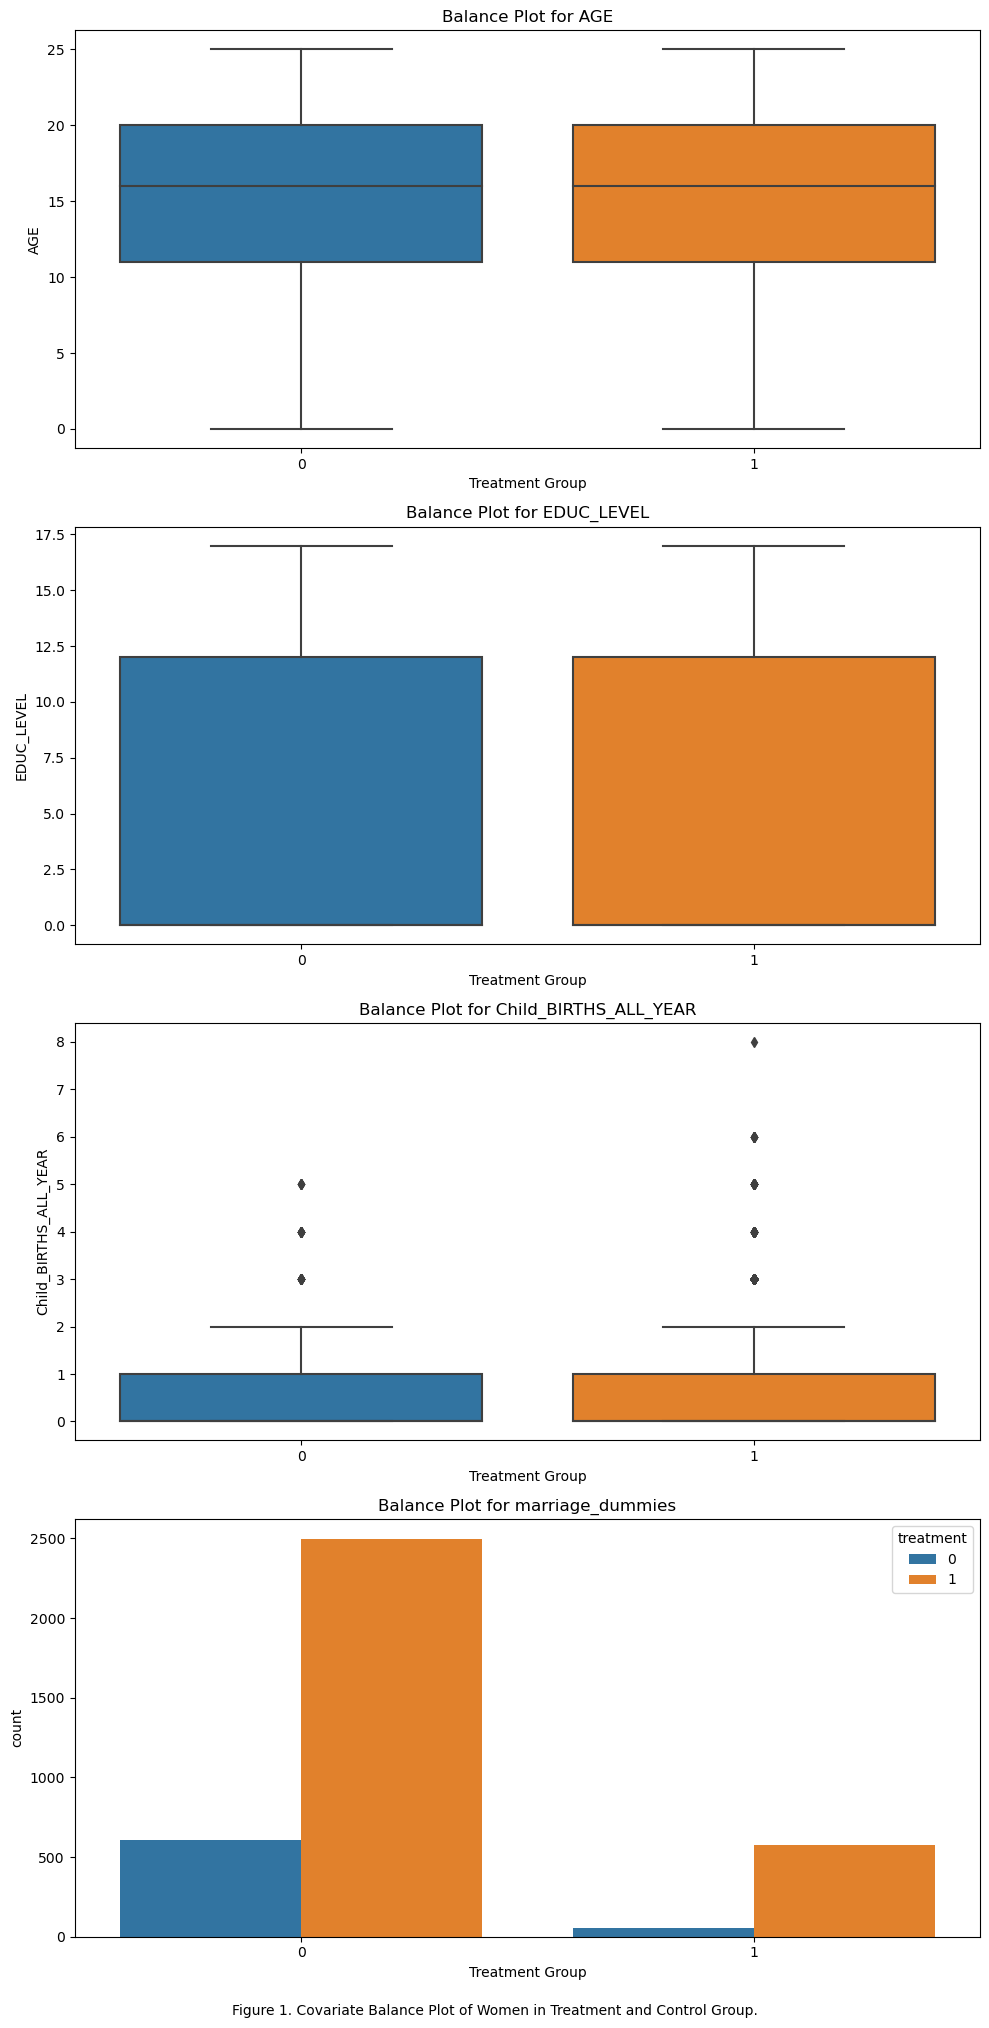

In [124]:
covariates = ['AGE','EDUC_LEVEL', 'Child_BIRTHS_ALL_YEAR','marriage_dummies']

# Create subplots
fig, axes = plt.subplots(len(covariates), 1, figsize=(10, 5*len(covariates)))

# For each covariate
for i, covariate in enumerate(covariates):
    if covariate in ['marriage_dummies', 'women_LFP' ]:
        # Create a bar plot for binary variables
        sns.countplot(data=filtered_age, x=covariate, hue='treatment', ax=axes[i])
    else:
        # Create a boxplot for other variables
        sns.boxplot(data=filtered_age, x='treatment', y=covariate, ax=axes[i])
        
    axes[i].set_title(f'Balance Plot for {covariate}')
    axes[i].set_xlabel('Treatment Group')

caption = 'Figure 1. Covariate Balance Plot of Women in Treatment and Control Group.'
fig.text(0.5, -0.01, caption, ha='center')

plt.tight_layout()
plt.show()

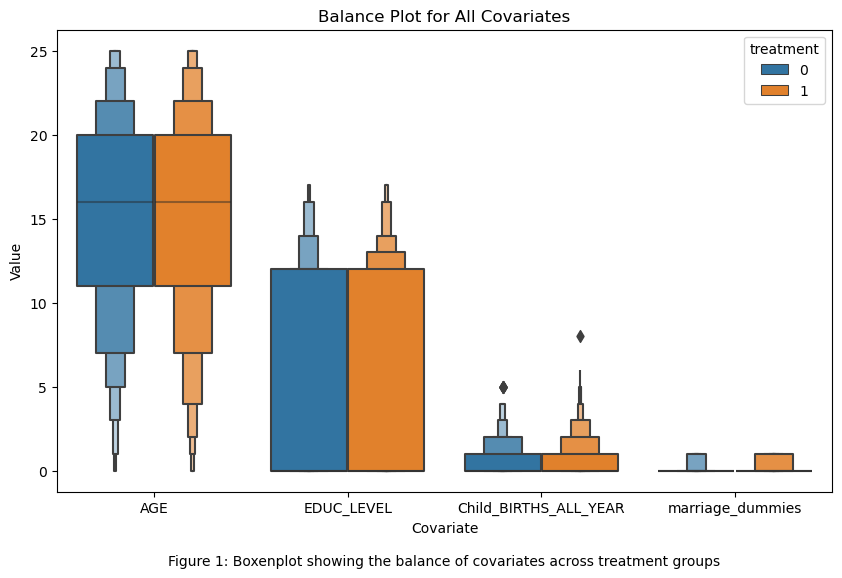

In [125]:
covariates = ['AGE','EDUC_LEVEL', 'Child_BIRTHS_ALL_YEAR','marriage_dummies']

# Melt the dataframe to a long format
long_df = filtered_age.melt(id_vars='treatment', value_vars=covariates, var_name='Covariate', value_name='Value')

# Create a boxenplot
plt.figure(figsize=(10, 6))
sns.boxenplot(data=long_df, x='Covariate', y='Value', hue='treatment')

plt.title('Balance Plot for All Covariates')
plt.xlabel('Covariate')
plt.ylabel('Value')

plt.text(0.5, -0.15, 'Figure 1: Boxenplot showing the balance of covariates across treatment groups',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

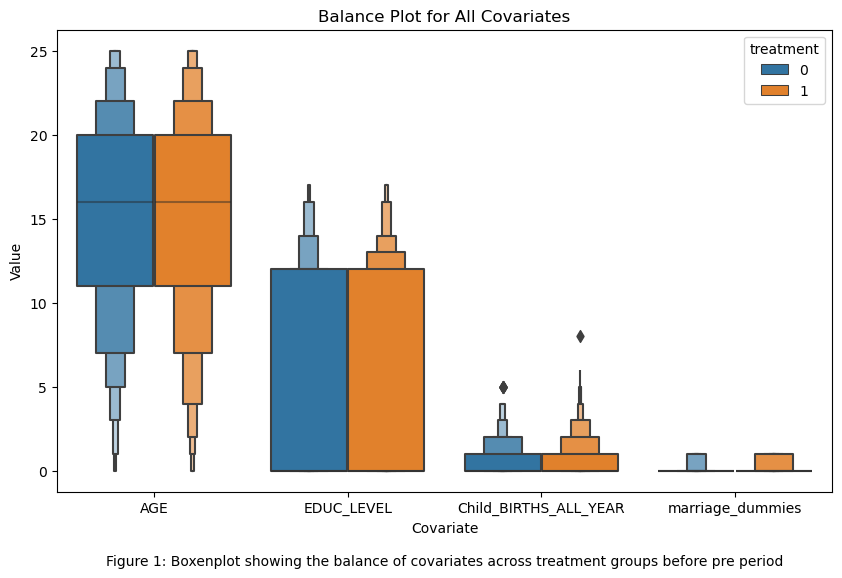

In [126]:
# Filter the data by year
mask_marriage_LFP = (filtered_age['YEAR'] >= 2001) & (filtered_age['YEAR'] <= 2017)
mask_other_variables = (filtered_age['YEAR'] >= filtered_age['YEAR'].min()) & (filtered_age['YEAR'] <= filtered_age['YEAR'].max())

# Create a copy of the original dataframe to avoid changing original data
filtered_copy = filtered_age.copy()

# Apply the mask to the dataframe
filtered_copy.loc[mask_marriage_LFP, ['marriage_dummies', 'women_LFP']] = filtered_age.loc[mask_marriage_LFP, ['marriage_dummies', 'women_LFP']]
filtered_copy.loc[mask_other_variables, ['AGE','EDUC_LEVEL', 'Child_BIRTHS_ALL_YEAR']] = filtered_age.loc[mask_other_variables, ['AGE','EDUC_LEVEL', 'Child_BIRTHS_ALL_YEAR']]

# Melt the dataframe to a long format
long_df1 = filtered_copy.melt(id_vars='treatment', value_vars=covariates, var_name='Covariate', value_name='Value')

# Create a boxenplot
plt.figure(figsize=(10, 6))
sns.boxenplot(data=long_df1, x='Covariate', y='Value', hue='treatment')

plt.title('Balance Plot for All Covariates')
plt.xlabel('Covariate')
plt.ylabel('Value')

plt.text(0.5, -0.15, 'Figure 1: Boxenplot showing the balance of covariates across treatment groups before pre period',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

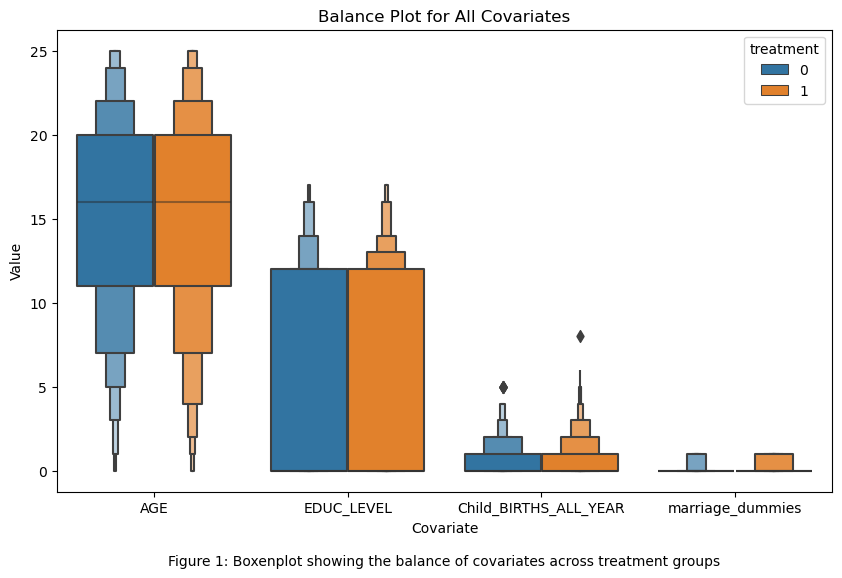

In [127]:
# Create a copy of the dataframe to avoid modifying original data
df_copy = filtered_age.copy()

# Filter the data by year
mask_marriage = (df_copy['YEAR'] >= 1) & (df_copy['YEAR'] <= 17)
df_copy.loc[~mask_marriage, 'marriage_dummies'] = np.nan  # Assign NaN for 'marriage_dummies' outside 2001-2017

covariates = ['AGE','EDUC_LEVEL', 'Child_BIRTHS_ALL_YEAR','marriage_dummies']

# Melt the dataframe to a long format
long_df = df_copy.melt(id_vars='treatment', value_vars=covariates, var_name='Covariate', value_name='Value')

# Create a boxenplot
plt.figure(figsize=(10, 6))
sns.boxenplot(data=long_df, x='Covariate', y='Value', hue='treatment')

plt.title('Balance Plot for All Covariates')
plt.xlabel('Covariate')
plt.ylabel('Value')

plt.text(0.5, -0.15, 'Figure 1: Boxenplot showing the balance of covariates across treatment groups',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

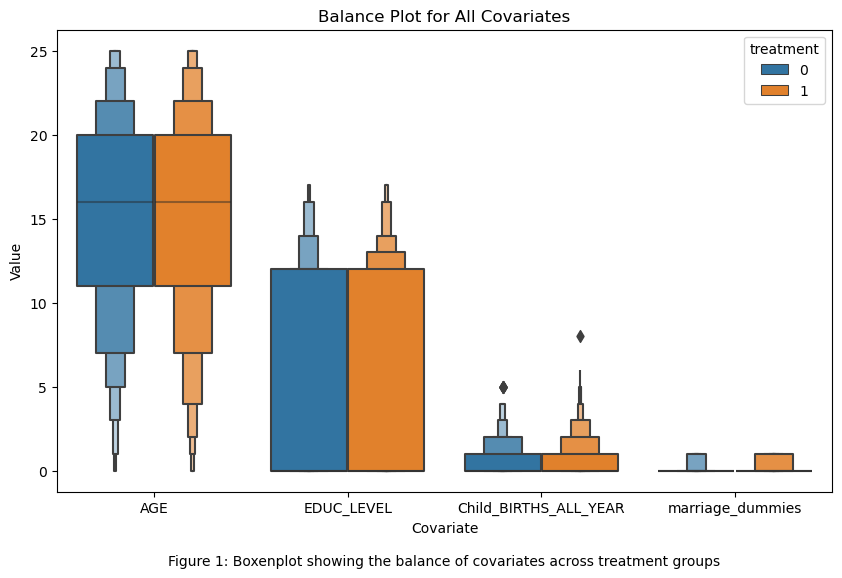

In [128]:
# Create a copy of the dataframe to avoid modifying original data
df_copy = filtered_age.copy()

# Filter the data by year
mask_marriage = (df_copy['YEAR'] < 1) | (df_copy['YEAR'] > 17)
df_copy.loc[mask_marriage, 'marriage_dummies'] = np.nan  # Assign NaN for 'marriage_dummies' outside 2001-2017

covariates = ['AGE','EDUC_LEVEL', 'Child_BIRTHS_ALL_YEAR','marriage_dummies']

# Melt the dataframe to a long format
long_df = df_copy.melt(id_vars='treatment', value_vars=covariates, var_name='Covariate', value_name='Value')

# Create a boxenplot
plt.figure(figsize=(10, 6))
sns.boxenplot(data=long_df, x='Covariate', y='Value', hue='treatment')

plt.title('Balance Plot for All Covariates')
plt.xlabel('Covariate')
plt.ylabel('Value')

plt.text(0.5, -0.15, 'Figure 1: Boxenplot showing the balance of covariates across treatment groups',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

plt.show()

In [129]:
long_df

,treatment,Covariate,Value
0,1,AGE,11.0
1,1,AGE,12.0
2,1,AGE,14.0
3,1,AGE,11.0
4,1,AGE,8.0
...,...,...,...
14951,0,marriage_dummies,NaN
14952,1,marriage_dummies,NaN
14953,1,marriage_dummies,NaN
14954,0,marriage_dummies,NaN


In [130]:
long_df1

,treatment,Covariate,Value
0,1,AGE,11
1,1,AGE,12
2,1,AGE,14
3,1,AGE,11
4,1,AGE,8
...,...,...,...
14951,0,marriage_dummies,0
14952,1,marriage_dummies,0
14953,1,marriage_dummies,0
14954,0,marriage_dummies,0


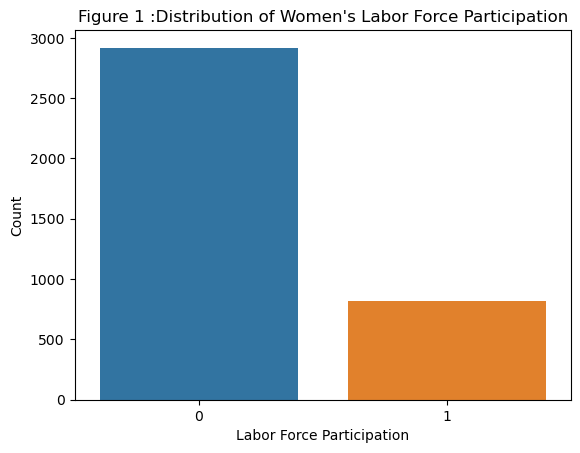

In [132]:
sns.countplot(data=filtered_age, x='women_LFP')

plt.title('Figure 1 :Distribution of Women\'s Labor Force Participation')
plt.xlabel('Labor Force Participation')
plt.ylabel('Count')

plt.show()